# To improve:
* output savename
* output savedir
* Plots units
* explain notebook

http://localhost:8888/notebooks/Azores/2022-02-14_Azores_simus_tests_20191001_fFTLE_1-64grid_15d.ipynb

In [1]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4, plotTrajectoriesFile, ErrorCode
from datetime import timedelta, datetime
from glob import glob
import xarray as xr
import numpy as np

In [2]:
outdir = '/Users/Gomez023/Postdoc/data/'

ds = xr.open_dataset(outdir + 'Particle_AZO_fFTLE_1-64grid_1001_15d.nc')

In [4]:
from math import sin, cos, sqrt, atan2, radians
import numpy as np
import xarray as xr
import numpy.linalg as LA

# Adapted from test03, adding the sqrt in FTLE calcn after discussing with Darshika (this version should be up to date w/ github function!!!
# reorganized filename and savename so easier to modify!!!

def dist_pairs_km(inlon1, inlon2, inlat1, inlat2):
    """
    source: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
    
    """
    # approximate radius of earth in km
    R = 6373.0

    lon1 = radians(inlon1)
    lat1 = radians(inlat1)
    lon2 = radians(inlon2)
    lat2 = radians(inlat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [5]:
# Parameters:

#Particle_AZO_grid100000_notides_Dec_week01_hourly.nc
grid_name = "1-64grid"
nyear = 2019
nmonth = 10
simu_length = 15. # monthly # days

# Defining grid of starting particles:

if grid_name == "1-8grid":
    step = .125 # degrees
elif grid_name == "1-64grid":
    step = 0.015625 # 1./64degrees
else:
    print("Error")
    fszfasgasg
    
lons, lats = np.meshgrid(np.arange(360.-30, 360.-15+step, step), np.arange(32, 38+step, step))
lons.shape[0]*lons.shape[1]

# data_path = '/Users/Gomez023/Postdoc/data/'
# fname = 'datos_Laura.nc'

369985

In [6]:
Td = simu_length
# step = .004 # degrees
# grid_lons, grid_lats = np.meshgrid(np.arange(-27, -21+step, step), np.arange(32.5, 36.5+step, step))

grid_lons = lons
grid_lats = lats

savename = '20191001_fFTLE_1-64grid_15d_CALCS' + '.npz' #savedir + 


######
x0 = np.reshape(ds['lon'][:,0].data, ( grid_lons.shape[0], grid_lons.shape[1] ))
x1 = np.reshape(ds['lon'][:,-1].data,( grid_lons.shape[0], grid_lons.shape[1] ))
y0 = np.reshape(ds['lat'][:,0].data, ( grid_lons.shape[0], grid_lons.shape[1] )) 
y1 = np.reshape(ds['lat'][:,-1].data, ( grid_lons.shape[0], grid_lons.shape[1] ))


H = x0.shape[0] 
L = x0.shape[1]

FTLE_f = np.ones_like(x0) * np.nan

J = np.empty([2,2],float)

# 1, H-1 --> to ignore bordersx for now
for i in range(1, H-1): # 0, H-2
    for j in range(1, L-1): # 0, L-2
        J[0][0] = dist_pairs_km(x1[i,j],x1[i-1,j], y1[i,j],y1[i-1,j]) / dist_pairs_km(x0[i,j],x0[i-1,j], y0[i,j],y0[i-1,j])
        ##gradF[:,0,0] = (X1rav[x1p] - X1rav[x1m])/dx1
        J[0][1] = dist_pairs_km(x1[i,j],x1[i,j-1], y1[i,j],y1[i,j-1]) / dist_pairs_km(x0[i,j],x0[i,j-1], y0[i,j],y0[i,j-1])
        J[1][0] = dist_pairs_km(x1[i,j],x1[i,j+1], y1[i,j],y1[i,j+1]) / dist_pairs_km(x0[i,j],x0[i,j+1], y0[i,j],y0[i,j+1])
        J[1][1] = dist_pairs_km(x1[i,j],x1[i+1,j], y1[i,j],y1[i+1,j]) / dist_pairs_km(x0[i,j],x0[i+1,j], y0[i,j],y0[i+1,j])

        if np.isnan(J).any():
            continue  
        else:

            D = np.dot(np.transpose(J),J)
            ##-->same
            # its largest eigenvalue
            lamda = LA.eigvals(D)
            ##-->same
            lam_max = max(lamda)
            FTLE_f[i][j] = (1/Td) * np.log(np.sqrt(lam_max))
            ##-->from sinha paper and from https://github.com/anirban89/llc_offline_lagrangian_analysis/blob/master/plot_lagrangian_diagnostics.ipynb

#savedir = filedir_root + 'FTLE/'
#savename = savedir + savename #'KDE_' + nfile.split('/')[-1].split('.nc')[0] + '.npz'
np.savez(savename, FTLE_f=FTLE_f) 

# Plot:

In [11]:
dFTLE_f_1_64grid_15d = np.load('20191001_fFTLE_1-64grid_15d_CALCS.npz')
FTLE_f_1_64grid_15d = dFTLE_f_1_64grid_15d['FTLE_f']

In [12]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

/opt/anaconda3/envs/py3_parcels/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


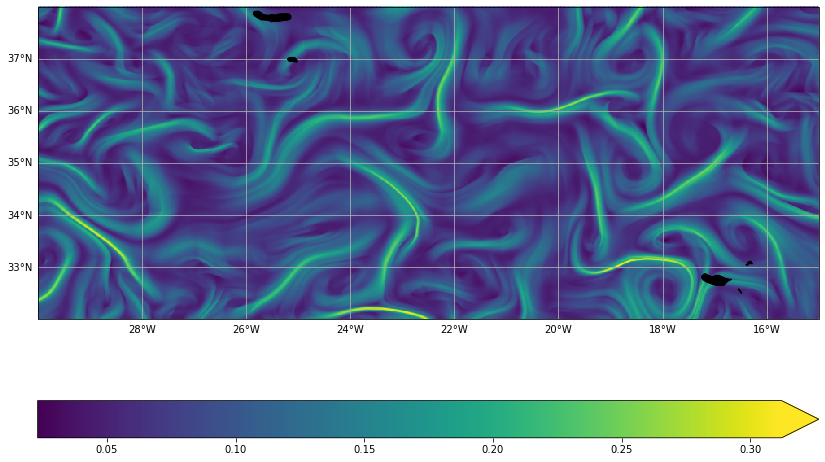

In [14]:
grid_lons = lons
grid_lats = lats


fig = plt.figure(figsize=(14, 10)) #(17,5)
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())

cc = ax1.pcolor(grid_lons, grid_lats, FTLE_f_1_64grid_15d, cmap='viridis', transform=ccrs.PlateCarree()) # , vmin=0., vmax=0.7#marker='o'

ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor='black', zorder=20)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


cbar = plt.colorbar(cc, extend='max', orientation='horizontal') #, cax=axC)

plt.show()